In [ ]:
#Mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

# This creates a symbolic link
!ln -s /content/gdrive/MyDrive/ /mydrive
!ls /mydrive

In [ ]:
#Load packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
#Dataset Preparation

# sgen_p, load_p, load_q
X_train = np.load("/mydrive/X_train.npy")
X_test = np.load("/mydrive/X_test.npy")
# line loading results
y_train = np.load("/mydrive/y_train.npy")
y_test = np.load("/mydrive/y_test.npy")

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train) #Remember X_train, X_test are already normalized

In [ ]:
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]

In [ ]:
#Construct model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[input_shape], activation="relu"), 
    tf.keras.layers.Dense(output_shape), 
])

#Set compilation parameters
model.compile(loss="mse", metrics=['accuracy','mse'], optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [ ]:
#Model training
history = model.fit(x=X_train, y=y_train, epochs = 140, batch_size=32, verbose = 0)

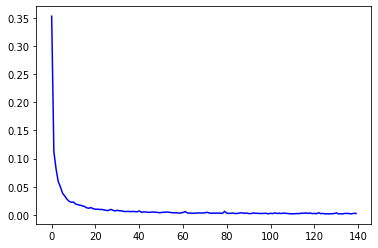

In [ ]:
#Plotting the loss function against epochs
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

In [ ]:
#Model prediction
y_predict = model.predict(X_test)
y_predict = scaler.inverse_transform(y_predict)

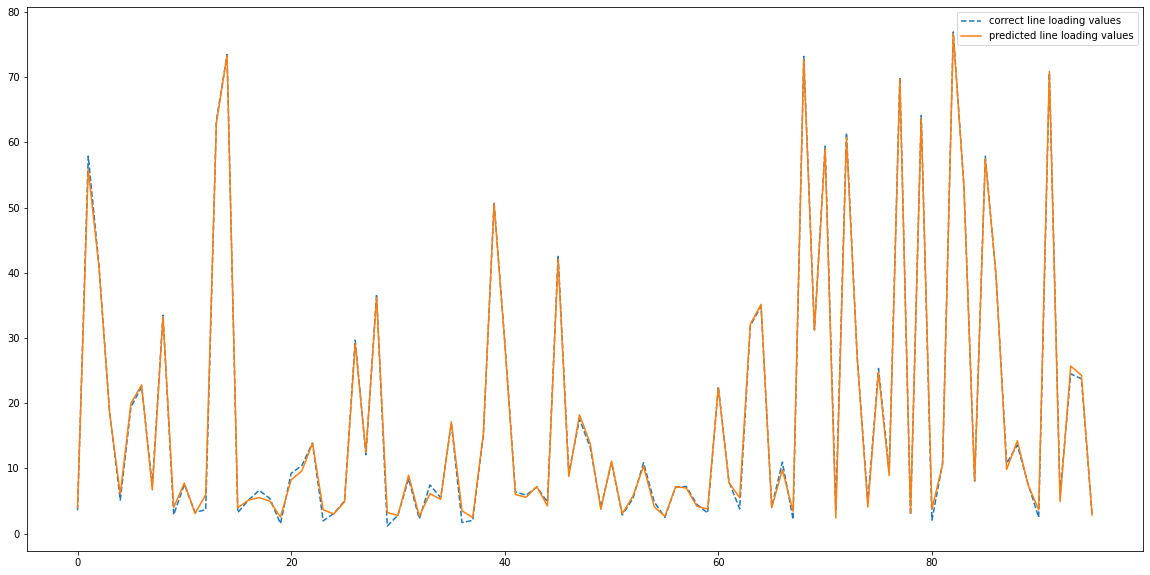

In [ ]:
import matplotlib.pyplot as plt

#Plot prediction
plt.figure(figsize=(20,10))
plt.plot(y_test[:96, 53], alpha=1, linestyle="--", label="correct line loading values")
plt.plot(y_predict[:96, 53], alpha=1, linestyle="-", label="predicted line loading values")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
#Model evaluation
mse = mean_squared_error(y_test,  y_predict)
print(f"the error is only {mse:.2f}%")

the error is only 0.03%
